# RL பயிற்சி மூலம் கார்ட்போல் சமநிலை அமைத்தல்

இந்த நோட்புக் [AI for Beginners Curriculum](http://aka.ms/ai-beginners) இன் ஒரு பகுதியாகும். இது [இந்த வலைப்பதிவு](https://medium.com/swlh/policy-gradient-reinforcement-learning-with-keras-57ca6ed32555), [அதிகாரப்பூர்வ TensorFlow ஆவணங்கள்](https://www.tensorflow.org/tutorials/reinforcement_learning/actor_critic) மற்றும் [இந்த Keras RL உதாரணம்](https://keras.io/examples/rl/actor_critic_cartpole/) ஆகியவற்றால் ஊக்கமளிக்கப்பட்டது.

இந்த உதாரணத்தில், RL ஐ பயன்படுத்தி ஒரு மாதிரியை பயிற்றுவித்து, இடது மற்றும் வலது திசையில் நகரும் ஒரு கார்டில் ஒரு கம்பத்தை சமநிலைப்படுத்த செய்வோம். [OpenAI Gym](https://www.gymlibrary.ml/) சூழலை பயன்படுத்தி கம்பத்தை சிமுலேட் செய்வோம்.

> **குறிப்பு**: இந்த பாடத்தின் குறியீட்டை உள்ளூரில் (எ.கா., Visual Studio Code-இல்) இயக்கலாம், அப்போது சிமுலேஷன் ஒரு புதிய சாளரத்தில் திறக்கப்படும். குறியீட்டை ஆன்லைனில் இயக்கும்போது, [இங்கே](https://towardsdatascience.com/rendering-openai-gym-envs-on-binder-and-google-colab-536f99391cc7) விவரிக்கப்பட்டுள்ளபடி, குறியீட்டில் சில மாற்றங்களைச் செய்ய வேண்டியிருக்கும்.

முதலில் Gym நிறுவப்பட்டுள்ளதா என்பதை உறுதிப்படுத்துவோம்:


In [1]:
import sys
!{sys.executable} -m pip install gym pygame

Defaulting to user installation because normal site-packages is not writeable


இப்போது CartPole சூழலை உருவாக்கி அதில் செயல்படுவது எப்படி என்பதை பார்ப்போம். ஒரு சூழல் பின்வரும் பண்புகளை கொண்டுள்ளது:

* **Action space** என்பது ஒவ்வொரு சிமுலேஷன் படியில் நாம் செய்யக்கூடிய சாத்தியமான செயல்களின் தொகுப்பாகும்
* **Observation space** என்பது நாம் செய்யக்கூடிய கவனிப்புகளின் இடமாகும்


In [2]:
import gym
import pygame
import tqdm

env = gym.make("CartPole-v1")

print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")

Action space: Discrete(2)
Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


/home/leo/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/leo/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


சிமுலேஷன் எப்படி செயல்படுகிறது என்பதை பார்ப்போம். கீழே உள்ள லூப் சிமுலேஷனை இயக்குகிறது, `env.step` முடிவுக்கான கொடி `done` ஐ திருப்பாதவரை. நாம் `env.action_space.sample()` பயன்படுத்தி சீரற்ற செயல்களை தேர்வு செய்வோம், இது பரிசோதனை மிக விரைவாக தோல்வியடையும் வாய்ப்பு உள்ளது (CartPole சூழல் CartPole இன் வேகம், அதன் நிலை அல்லது கோணம் குறிப்பிட்ட வரம்புகளை மீறும்போது முடிவடைகிறது).

> சிமுலேஷன் புதிய சாளரத்தில் திறக்கப்படும். நீங்கள் கோ드를 பல முறை இயக்கி அதன் நடத்தை எப்படி இருக்கிறது என்பதை பார்க்கலாம்.


In [3]:
env.reset()

done = False
total_reward = 0
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   total_reward += rew
   print(f"{obs} -> {rew}")
print(f"Total reward: {total_reward}")

env.close()

/home/leo/.local/lib/python3.10/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


[ 0.00425272 -0.19994313  0.00917169  0.34113726] -> 1.0
[ 0.00025386 -0.00495286  0.01599443  0.05136059] -> 1.0
[ 1.5480528e-04  1.8993615e-01  1.7021643e-02 -2.3623335e-01] -> 1.0
[ 0.00395353  0.38481084  0.01229698 -0.5234989 ] -> 1.0
[ 0.01164974  0.18951797  0.001827   -0.22696657] -> 1.0
[ 0.0154401   0.38461378 -0.00271233 -0.51907265] -> 1.0
[ 0.02313238  0.5797738  -0.01309379 -0.812609  ] -> 1.0
[ 0.03472786  0.38483363 -0.02934597 -0.5240733 ] -> 1.0
[ 0.04242453  0.580356   -0.03982743 -0.8258571 ] -> 1.0
[ 0.05403165  0.38580072 -0.05634458 -0.54596174] -> 1.0
[ 0.06174766  0.19151384 -0.06726381 -0.27155042] -> 1.0
[ 0.06557794 -0.00258703 -0.07269482 -0.00081817] -> 1.0
[ 0.0655262  -0.19659522 -0.07271118  0.26807207] -> 1.0
[ 0.0615943  -0.00051497 -0.06734974 -0.04662942] -> 1.0
[ 0.061584    0.19550486 -0.06828233 -0.3597784 ] -> 1.0
[ 0.06549409  0.00141663 -0.0754779  -0.08938391] -> 1.0
[ 0.06552242 -0.19254686 -0.07726558  0.17856352] -> 1.0
[ 0.06167149  0.003

நீங்கள் கவனிக்கலாம், அவதானிப்புகளில் 4 எண்கள் உள்ளன. அவை:
- வண்டியின் நிலை
- வண்டியின் வேகம்
- கம்பத்தின் கோணம்
- கம்பத்தின் சுழற்சி வீக்கம்

`rew` என்பது ஒவ்வொரு படியிலும் நாம் பெறும் வெகுமதியாகும். CartPole சூழலில் ஒவ்வொரு சிமுலேஷன் படியிலும் உங்களுக்கு 1 புள்ளி வெகுமதி வழங்கப்படுகிறது, மேலும் முழு வெகுமதியை அதிகரிப்பதே இலக்கு, அதாவது CartPole விழாமல் சமநிலையைப் பேணும் நேரத்தை அதிகரிக்க வேண்டும்.

மீள்பயிற்சி கற்றலில், எங்கள் இலக்கு **policy** $\pi$ ஐ பயிற்சி செய்ய வேண்டும், இது ஒவ்வொரு நிலை $s$ க்கும் எவ்வாறு செயல்பட $a$ என்பதை எங்களுக்கு கூறும், அதாவது $a = \pi(s)$.

நீங்கள் சாத்தியமான தீர்வை விரும்பினால், policy ஐ ஒவ்வொரு செயலுக்கான சாத்தியக்கூறுகளைத் திருப்பும் ஒன்றாகக் கருதலாம், அதாவது $\pi(a|s)$ என்பது $s$ நிலைமையில் செயல்பாடு $a$ எடுக்க வேண்டும் என்ற சாத்தியக்கூறாக இருக்கும்.

## Policy Gradient முறை

எளிய RL ஆல்காரிதத்தில், **Policy Gradient** எனப்படும், அடுத்த செயல்பாட்டை கணிக்க நரம்பியல் வலையமைப்பை (neural network) பயிற்சி செய்ய உள்ளோம்.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

num_inputs = 4
num_actions = 2

model = keras.Sequential([
    keras.layers.Dense(128, activation="relu",input_shape=(num_inputs,)),
    keras.layers.Dense(num_actions, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01))

/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py:29: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
2022-07-24 16:50:47.597258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 16:50:47.597280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/lib/python3.10/dist-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
2022-07-24 16:50:49.838826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read fr

நாம் பல பரிசோதனைகளை இயக்கி, ஒவ்வொரு இயக்கத்திற்குப் பிறகும் நமது நெட்வொர்க்கை புதுப்பித்து, நெட்வொர்க்கை பயிற்சி செய்யப் போகிறோம். பரிசோதனையை இயக்கி முடிவுகளை (அதாவது **trace**) - அனைத்து நிலைகள், செயல்கள் (மற்றும் அவற்றின் பரிந்துரைக்கப்பட்ட சாத்தியங்கள்), மற்றும் வெகுமதிகளை - திருப்பி அனுப்பும் ஒரு செயல்பாட்டை வரையறுப்போம்:


In [5]:
def run_episode(max_steps_per_episode = 10000,render=False):    
    states, actions, probs, rewards = [],[],[],[]
    state = env.reset()
    for _ in range(max_steps_per_episode):
        if render:
            env.render()
        action_probs = model(np.expand_dims(state,0))[0]
        action = np.random.choice(num_actions, p=np.squeeze(action_probs))
        nstate, reward, done, info = env.step(action)
        if done:
            break
        states.append(state)
        actions.append(action)
        probs.append(action_probs)
        rewards.append(reward)
        state = nstate
    return np.vstack(states), np.vstack(actions), np.vstack(probs), np.vstack(rewards)

நீங்கள் பயிற்சி செய்யப்படாத நெட்வொர்க்குடன் ஒரு எபிசோடைப் இயக்கி, மொத்த வெகுமதியை (எபிசோடின் நீளம் எனவும் அழைக்கப்படுகிறது) மிகவும் குறைவாக இருப்பதை கவனிக்கலாம்:


In [6]:
s,a,p,r = run_episode()
print(f"Total reward: {np.sum(r)}")

Total reward: 27.0


கொள்கை சாய்வு الگரிதம் (policy gradient algorithm) தொடர்பான சிக்கலான அம்சங்களில் ஒன்று **தள்ளுபடி செய்யப்பட்ட வெகுமதிகளை** (discounted rewards) பயன்படுத்துவது ஆகும். இதன் கருத்து என்னவென்றால், விளையாட்டின் ஒவ்வொரு படியிலும் மொத்த வெகுமதிகளின் வெகுமதி வெகுமதிகளை (total rewards) கணக்கிடுகிறோம், மேலும் இந்த செயல்முறையின் போது சில குணகம் $gamma$ பயன்படுத்தி ஆரம்ப வெகுமதிகளை தள்ளுபடி செய்கிறோம். மேலும், resulting vector ஐ நாங்கள் சாதாரணமாக்குகிறோம், ஏனெனில் அதை நாங்கள் பயிற்சியை பாதிக்க எடை (weight) ஆக பயன்படுத்துவோம்:


In [7]:
eps = 0.0001

def discounted_rewards(rewards,gamma=0.99,normalize=True):
    ret = []
    s = 0
    for r in rewards[::-1]:
        s = r + gamma * s
        ret.insert(0, s)
    if normalize:
        ret = (ret-np.mean(ret))/(np.std(ret)+eps)
    return ret

இப்போது நாங்கள் உண்மையான பயிற்சியை தொடங்குவோம்! நாங்கள் 300 எபிசோடுகளை இயக்குவோம், மேலும் ஒவ்வொரு எபிசோடிலும் கீழே கொடுக்கப்பட்டுள்ளவற்றை செய்வோம்:

1. பரிசோதனையை இயக்கி, அதன் தடத்தை சேகரிக்கவும்
2. எடுத்த நடவடிக்கைகள் மற்றும் கணிக்கப்பட்ட சாத்தியக்கூறுகளுக்கு இடையிலான வேறுபாட்டை (`gradients`) கணக்கிடவும். வேறுபாடு குறைவாக இருக்கும் போது, சரியான நடவடிக்கையை எடுத்ததற்கான நம்பிக்கை அதிகமாக இருக்கும்.
3. தள்ளுபடி செய்யப்பட்ட வெகுமதிகளை கணக்கிட்டு, `gradients`-ஐ தள்ளுபடி செய்யப்பட்ட வெகுமதிகளால் பெருக்கவும் - இது அதிக வெகுமதி கொண்ட படிகள் இறுதி முடிவில் அதிக தாக்கத்தை ஏற்படுத்தும், குறைந்த வெகுமதி கொண்டவற்றை விட.
4. நமது நரம்பியல் வலையமைப்புக்கான எதிர்பார்க்கப்படும் இலக்கு நடவடிக்கைகள் ஓட்டத்தின் போது கணிக்கப்பட்ட சாத்தியக்கூறுகளிலிருந்து ஒரு பகுதியும், கணக்கிடப்பட்ட `gradients`-லிருந்து ஒரு பகுதியும் எடுக்கப்படும். `alpha` பராமானை பயன்படுத்தி `gradients` மற்றும் வெகுமதிகள் எந்த அளவுக்கு கணக்கில் கொள்ளப்பட வேண்டும் என்பதை தீர்மானிக்கிறோம் - இதை reinforcement algorithm-இன் *learning rate* என்று அழைக்கப்படுகிறது.
5. இறுதியாக, நாங்கள் நமது வலையமைப்பை நிலைகள் மற்றும் எதிர்பார்க்கப்படும் நடவடிக்கைகளின் அடிப்படையில் பயிற்சி செய்து, செயல்முறையை மீண்டும் மீண்டும் செய்கிறோம்


0 -> 29.0


2022-07-24 16:50:51.475024: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


100 -> 135.0
200 -> 484.0


2022-07-24 16:51:35.910774: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-07-24 16:51:37.151017: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-07-24 16:51:39.284311: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-07-24 16:51:42.235074: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-07-24 16:51:44.691458: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-07-24 16:51:48.381946: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


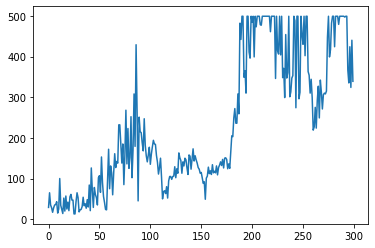

In [8]:
alpha = 1e-4

history = []
for epoch in range(300):
    states, actions, probs, rewards = run_episode()
    one_hot_actions = np.eye(2)[actions.T][0]
    gradients = one_hot_actions-probs
    dr = discounted_rewards(rewards)
    gradients *= dr
    target = alpha*np.vstack([gradients])+probs
    model.train_on_batch(states,target)
    history.append(np.sum(rewards))
    if epoch%100==0:
        print(f"{epoch} -> {np.sum(rewards)}")

plt.plot(history)

இப்போது விளைவைக் காண எபிசோடைக் காட்சியுடன் இயக்குவோம்:


In [10]:
_ = run_episode(render=True)

error: display Surface quit

நீங்கள் இப்போது கம்பம் நன்றாக சமநிலைப்படுத்தப்படுவதைப் பார்க்க முடியும் என்று நம்புகிறேன்!

## நடிகர்-விமர்சகர் மாடல்

நடிகர்-விமர்சகர் மாடல் என்பது கொள்கை சார்ந்த மாடல்களின் மேலும் ஒரு மேம்பாடு ஆகும், இதில் கொள்கை மற்றும் மதிப்பீடு செய்யப்பட்ட வெகுமதிகளை கற்றுக்கொள்வதற்காக நரம்பியல் வலைப்பின்னல்களை உருவாக்குகிறோம். இந்த வலைப்பின்னலுக்கு இரண்டு வெளியீடுகள் இருக்கும் (அல்லது நீங்கள் இதை இரண்டு தனி வலைப்பின்னல்களாகக் காணலாம்):
* **நடிகர்** கொள்கை சார்ந்த மாடலில் போலவே, மாநில சாத்தியக்கூறு விநியோகத்தை வழங்குவதன் மூலம் எடுக்க வேண்டிய நடவடிக்கையை பரிந்துரைக்கும்.
* **விமர்சகர்** அந்த நடவடிக்கைகளிலிருந்து கிடைக்கும் வெகுமதியை மதிப்பீடு செய்யும். இது கொடுக்கப்பட்ட மாநிலத்தில் எதிர்காலத்தில் கிடைக்கும் மொத்த மதிப்பீட்ட வெகுமதிகளைத் திருப்பி அளிக்கும்.

இவ்வாறு ஒரு மாடலை வரையறுப்போம்:


In [ ]:
num_inputs = 4
num_actions = 2
num_hidden = 128

inputs = keras.layers.Input(shape=(num_inputs,))
common = keras.layers.Dense(num_hidden, activation="relu")(inputs)
action = keras.layers.Dense(num_actions, activation="softmax")(common)
critic = keras.layers.Dense(1)(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])

நாம் `run_episode` செயல்பாட்டை சற்று மாற்றி, விமர்சகர் முடிவுகளையும் திருப்பி அனுப்ப வேண்டும்:


In [ ]:
def run_episode(max_steps_per_episode = 10000,render=False):    
    states, actions, probs, rewards, critic = [],[],[],[],[]
    state = env.reset()
    for _ in range(max_steps_per_episode):
        if render:
            env.render()
        action_probs, est_rew = model(np.expand_dims(state,0))
        action = np.random.choice(num_actions, p=np.squeeze(action_probs[0]))
        nstate, reward, done, info = env.step(action)
        if done:
            break
        states.append(state)
        actions.append(action)
        probs.append(tf.math.log(action_probs[0,action]))
        rewards.append(reward)
        critic.append(est_rew[0,0])
        state = nstate
    return states, actions, probs, rewards, critic

இப்போது நாங்கள் முக்கிய பயிற்சி சுற்றத்தை இயக்குவோம். சரியான இழப்பு செயல்பாடுகளை கணக்கிட்டு, நெட்வொர்க் அளவுருக்களை புதுப்பிப்பதன் மூலம் கையேடு நெட்வொர்க் பயிற்சி செயல்முறையை பயன்படுத்துவோம்:


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
episode_count = 0
running_reward = 0

while True:  # Run until solved
    state = env.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        _,_,action_probs, rewards, critic_values = run_episode()
        episode_reward = np.sum(rewards)
        
        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate discounted rewards that will be labels for our critic
        dr = discounted_rewards(rewards)

        # Calculating loss values to update our network
        actor_losses = []
        critic_losses = []
        for log_prob, value, rew in zip(action_probs, critic_values, dr):
            # When we took the action with probability `log_prob`, we received discounted reward of `rew`,
            # while critic predicted it to be `value` 
            # First we calculate actor loss, to make actor predict actions that lead to higher rewards
            diff = rew - value
            actor_losses.append(-log_prob * diff)

            # The critic loss is to minimize the difference between predicted reward `value` and actual
            # discounted reward `rew`
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(rew, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

    if running_reward > 195:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break


running reward: 5.82 at episode 10
running reward: 9.43 at episode 20
running reward: 10.30 at episode 30
running reward: 10.28 at episode 40
running reward: 11.00 at episode 50
running reward: 13.01 at episode 60
running reward: 21.78 at episode 70
running reward: 40.54 at episode 80
running reward: 73.70 at episode 90
running reward: 100.19 at episode 100
running reward: 159.20 at episode 110
Solved at episode 114!


எபிசோடைக் கையாள்ந்து எங்கள் மாடல் எவ்வளவு சிறந்தது என்பதை பார்ப்போம்:


In [ ]:
_ = run_episode(render=True)

In [ ]:
env.close()

## முக்கிய குறிப்புகள்

இந்த டெமோவில் நாம் இரண்டு RL அல்காரிதங்களை பார்த்தோம்: எளிய கொள்கை சாய்வு (simple policy gradient) மற்றும் மேலும் மேம்பட்ட நடிகர்-விமர்சகர் (actor-critic). இந்த அல்காரிதங்கள் மாநிலம், செயல் மற்றும் வெகுமதி போன்ற சுருக்கமான கருத்துக்களுடன் செயல்படுகின்றன - எனவே அவை மிகவும் மாறுபட்ட சூழல்களில் பயன்படுத்தப்படலாம்.

மீளுருவாக்கக் கற்றல் (Reinforcement learning) இறுதி வெகுமதியைப் பார்த்து மட்டுமே பிரச்சினையைத் தீர்க்க சிறந்த உத்தியை கற்றுக்கொள்ள அனுமதிக்கிறது. லேபிள் செய்யப்பட்ட தரவுத்தொகுப்புகள் தேவையில்லை என்பதால், நமது மாதிரிகளை மேம்படுத்த பல முறை சிமுலேஷன்களை மீண்டும் செய்ய முடிகிறது. இருப்பினும், RL இல் இன்னும் பல சவால்கள் உள்ளன, மேலும் இந்த சுவாரஸ்யமான AI துறையில் அதிக கவனம் செலுத்த முடிவு செய்தால் நீங்கள் அவற்றைப் பற்றி கற்றுக்கொள்ளலாம்.



---

**குறிப்பு**:  
இந்த ஆவணம் [Co-op Translator](https://github.com/Azure/co-op-translator) என்ற AI மொழிபெயர்ப்பு சேவையைப் பயன்படுத்தி மொழிபெயர்க்கப்பட்டுள்ளது. நாங்கள் துல்லியத்திற்காக முயற்சிக்கிறோம், ஆனால் தானியக்க மொழிபெயர்ப்புகளில் பிழைகள் அல்லது தவறான தகவல்கள் இருக்கக்கூடும் என்பதை தயவுசெய்து கவனத்தில் கொள்ளுங்கள். அதன் தாய்மொழியில் உள்ள மூல ஆவணம் அதிகாரப்பூர்வ ஆதாரமாக கருதப்பட வேண்டும். முக்கியமான தகவல்களுக்கு, தொழில்முறை மனித மொழிபெயர்ப்பு பரிந்துரைக்கப்படுகிறது. இந்த மொழிபெயர்ப்பைப் பயன்படுத்துவதால் ஏற்படும் எந்த தவறான புரிதல்கள் அல்லது தவறான விளக்கங்களுக்கு நாங்கள் பொறுப்பல்ல.
